Extracting EDF parameters from t:\GITHUB\DATA_ANALYSIS_TOOLS\1.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 143999  =      0.000 ...  1124.992 secs...


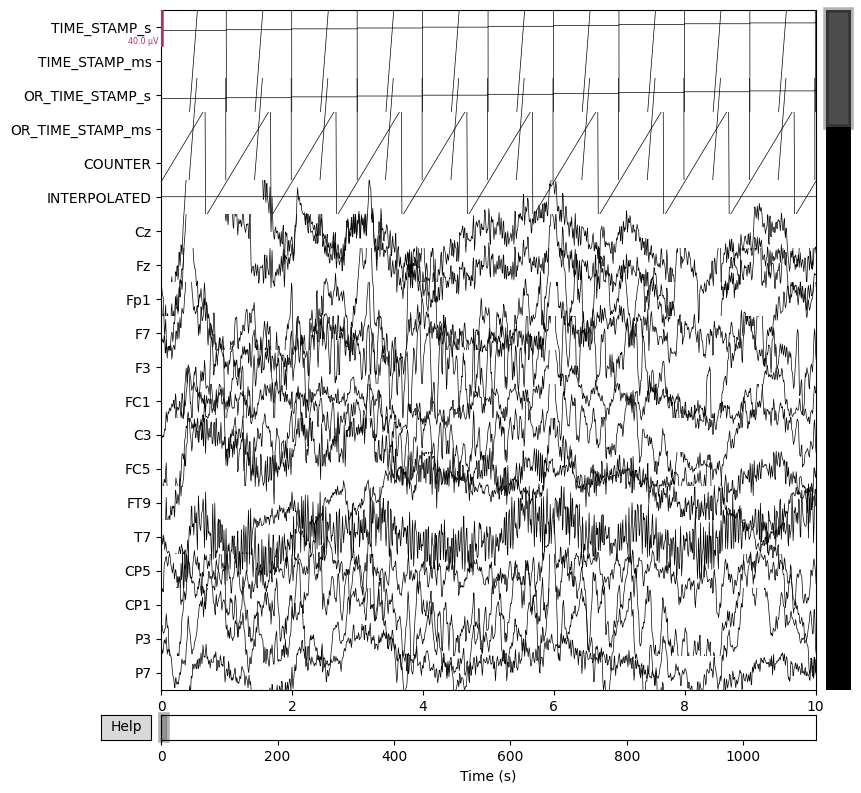

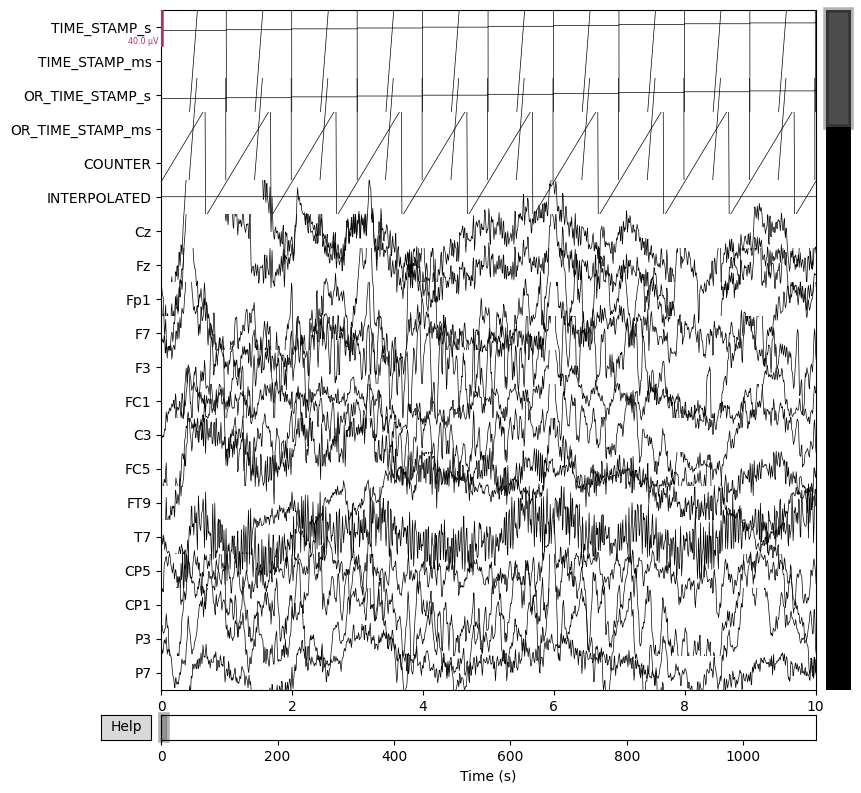

In [2]:
import mne

raw = mne.io.read_raw_edf('1.edf', preload=True)
raw.plot() 


Creating RawArray with float64 data, n_channels=32, n_times=12206
    Range : 0 ... 12205 =      0.000 ...    95.352 secs
Ready.


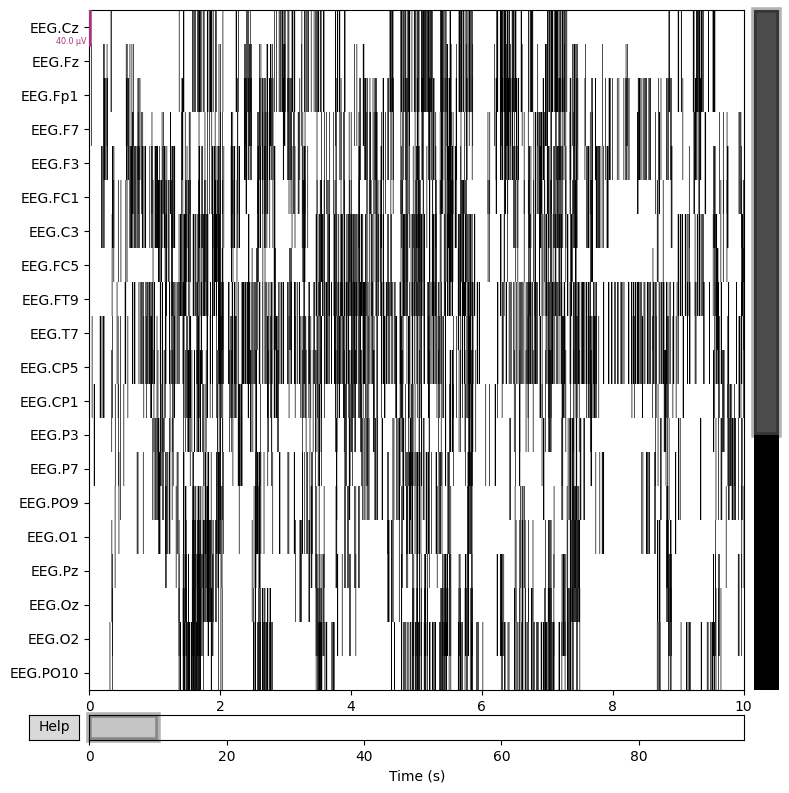

In [6]:
import pandas as pd
import numpy as np
import mne
import matplotlib.pyplot as plt

# Load
csv_file = '103918/split/103918.From_Baseline_to_videos_1_excited_1_motorsports_kenMiles.mp4_0-12208.csv'
df = pd.read_csv(csv_file, skiprows=[0]) # Do not skip first row since we want headers in this way to transpose

# Define EEG columns
eeg_channels = [
    'EEG.Cz', 'EEG.Fz', 'EEG.Fp1', 'EEG.F7', 'EEG.F3', 'EEG.FC1', 'EEG.C3', 'EEG.FC5',
    'EEG.FT9', 'EEG.T7', 'EEG.CP5', 'EEG.CP1', 'EEG.P3', 'EEG.P7', 'EEG.PO9', 'EEG.O1',
    'EEG.Pz', 'EEG.Oz', 'EEG.O2', 'EEG.PO10', 'EEG.P8', 'EEG.P4', 'EEG.CP2', 'EEG.CP6',
    'EEG.T8', 'EEG.FT10', 'EEG.FC6', 'EEG.C4', 'EEG.FC2', 'EEG.F4', 'EEG.F8', 'EEG.Fp2'
]

# Extract data
eeg_data = df[eeg_channels].values.T  # Transpose to shape (n_channels, n_times)

# Define info
sfreq = 128  # Hz
ch_names = eeg_channels  # List of channel names
ch_types = ['eeg'] * len(ch_names)  # All channels are  'eeg'

# Create class instance
info = mne.create_info(ch_names=ch_names, sfreq=sfreq, ch_types=ch_types)

# Create RawArray obj
raw = mne.io.RawArray(eeg_data, info)

# Plot data
raw.plot()

# Needed to keep window open
plt.show()
